NLP_df_labeled 
ggl sheet: NLP_df_unlimit_final_more_for_upload     


In [7]:
'''! pip install pandas
! pip install keras
! pip install pythainlp
! pip install scikit-learn
! pip install numpy
! pip install matplotlib
! pip install seaborn'''


'! pip install pandas\n! pip install keras\n! pip install pythainlp'

In [18]:
import os
import re
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import load_model
from pythainlp.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from pythainlp.corpus import thai_stopwords
from pythainlp.util import normalize

In [19]:
def stopwords_rm(text):
    stopwords = set(thai_stopwords())
    stopwords.update(["nan", "-", "_", "", " ", "฿" ,"ค่ะ", "ครับ", "จ้า"])  # Add more stopwords as needed

    # Remove stopwords from the text
    cleaned_text = ' '.join(word for word in text.split() if word not in stopwords)
    return cleaned_text


def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def normie(df):
    print('cleaning . . .')
    i = 0 #row number
    df['cleaned1'] = ''
    for row in df['cleaned']:
        clean = ''
        j = row.split(' ') #j is array of string
        for word in j:
            clean = clean + ' ' + normalize(word) #spell(word)[0] #correct(word)
        df['cleaned1'].iloc[i] = clean
        i += 1
    print('done cleaning by normalization')
    return df['cleaned1']
def alone(df):
    print('Are you alone?')
    i = 0 #row number
    df['cleaned1'] = ''
    for row in df['cleaned']:
        words = row.split() #j is array of string
        cleaned = [word for word in words if len(word) > 1]
        cleaned_string = " ".join(cleaned)
        df['cleaned1'].iloc[i] = cleaned_string
        i += 1
    print('done cleaning alone')
    return df['cleaned1']


In [20]:
df_all = pd.read_csv("./df_y4s2_v1_Natt48.csv") #have chad chat 48 true entries
df_1 = pd.read_csv("./df_y4s2_final_new.csv")
df_all1 = pd.concat([df_all,df_1])
df_all1['Chadchad'] = df_all1['Chadchad'].fillna('no')
df_all1 = df_all1.drop_duplicates(subset='tweet_text', keep='last')
#df_all1.shape #(3646, 17)
df_a = df_all1


In [21]:
df_a['relevant'].value_counts() 

relevant
False    3327
True      319
Name: count, dtype: int64

random drop false num_drop(3008 data entries) for resolve imbalance data

In [22]:
num_drop = int(df_a[df_a['relevant'] == False].shape[0]) - int(df_a[df_a['relevant'] == True].shape[0])
np.random.seed(int(time.time()))
false_rows = df_a[(df_a['relevant'] == False)] # & (pd.notna(df_a['mentioned_location'])) 1536 entries last checked with mno mentioned location
rows_to_keep = false_rows.sample(n=319, random_state=42) 

df_dropped = df_a[df_a['relevant'] != False]
df_a = pd.concat([df_dropped,rows_to_keep])
df_a['relevant'].value_counts() #balanced

relevant
True     319
False    319
Name: count, dtype: int64

In [23]:
df_a['split_text'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm",keep_whitespace=False), axis=1) #use this
df_a['combined'] = [' '.join(lst) for lst in df_a['split_text']]
df_a['cleaned'] = df_a['combined'].apply(deEmojify)
df_a['cleaned'] = df_a['cleaned'].apply(stopwords_rm) #use in X
#df_a['cleaned'] = normie(df_a)
df_a['cleaned'] = alone(df_a)
df_a['split_cleaned'] = df_a.apply(lambda row: word_tokenize(row['cleaned'],engine="newmm",keep_whitespace=False), axis=1) #use in counting words

#newmm cuts better than nemm-safe ศร, ีฯ ค่,ะ #attacut is virus
#try other engine or break larger, add space in between  
#df_a['split_text2'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm-safe",keep_whitespace=False), axis=1)'''


Are you alone?
done cleaning alone


C:\Users\natkn\AppData\Local\Temp\ipykernel_17072\415578056.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[i] = cleaned_string
C:\Users\natkn\AppData\Local\Temp\ipykernel_17072\415578056.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[i] = cleaned_string
C:\Users\natkn\AppData\Local\Temp\ipykernel_17072\415578056.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned1'].iloc[

https://pythainlp.github.io/dev-docs/api/tokenize.html

counting for good, area

In [24]:
df_a['relevance_nlp'] = df_a['relevant'].apply(lambda x: 'relevant' if x else 'not relevant')
df_a = df_a.dropna(subset=['tweet_text'])
df_a['contain_area'],df_a['contain_good'] = '2','2'
for i in range(df_a['split_cleaned'].shape[0]):
    if 'ดี' in df_a['split_cleaned'].iloc[i]:
        df_a['contain_good'].iloc[i] = '1'
    else:
        df_a['contain_good'].iloc[i] = '0'

for i in range(df_a['split_cleaned'].shape[0]):
    if 'พื้นที่' in df_a['split_cleaned'].iloc[i]:
        df_a['contain_area'].iloc[i] = '1'
    else:
        df_a['contain_area'].iloc[i] = '0'
df_a = df_a.dropna(subset=['tweet_text'])

C:\Users\natkn\AppData\Local\Temp\ipykernel_17072\3348223842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['contain_good'].iloc[i] = '0'
C:\Users\natkn\AppData\Local\Temp\ipykernel_17072\3348223842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['contain_good'].iloc[i] = '0'
C:\Users\natkn\AppData\Local\Temp\ipykernel_17072\3348223842.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['contain_good'].iloc[i] =

In [25]:
df_a['word_length'] = df_a['split_cleaned'].str.len()

In [26]:
df_a['word_length'].sort_values(ascending=False) 

2768    132
2770     93
2783     79
2797     76
2771     76
       ... 
2524      4
1233      4
2753      4
2112      2
2758      2
Name: word_length, Length: 638, dtype: int64

thai2fit embedding

(638,)

In [ ]:
def sentences_to_indices(X, word2vec, max_len):
    m = df_a['relevant'].values.shape[0]                            # number of training examples
    # Initialize X_indices as a numpy matrix of zeros and the correct shape (≈ 1 line)
    X_indices = np.zeros((m, max_len))
    for i in range(m):                               # loop over training examples
        # Convert the ith training sentence in lower case and split is into words. You should get a list of words.
        sentence_words = X[i].lower().split()[:max_len]

        # Initialize j to 0
        j = 0

        # Loop over the words of sentence_words
        for w in sentence_words:
            # Set the (i,j)th entry of X_indices to the index of the correct word.
            if w in word2vec:
              X_indices[i, j] = word2vec.wv.vocab[w].index
              # Increment j to j + 1
              j = j + 1

    return X_indices

In [1]:
from pythainlp.word_vector import WordVector
wv = WordVector()
word2vec = wv.get_model()
vocab_len = len(word2vec.index_to_key) + 1 
emb_dim = word2vec["สวัสดี"].shape[0] #300

In [12]:
def pretrained_embedding_layer(word2vec):
    emb_matrix = np.zeros((vocab_len, emb_dim))
    for word, index in word2vec.index_to_key:
        emb_matrix[index.index, :] = word2vec[word]

    embedding_layer = Embedding(vocab_len, emb_dim)
    ### END CODE HERE ###

    # Build the embedding layer, it is required before setting the weights of the embedding layer. Do not modify the "None".
    embedding_layer.build((None,))

    # Set the weights of the embedding layer to the embedding matrix. Your layer is now pretrained.
    embedding_layer.set_weights([emb_matrix])

    return embedding_layer

In [10]:
for sentence in df_a.cleaned.values:
    a = np.zeros()
    for word in sentence:
        if word in word2vec.index_to_key:
            
        else:

    a = wv.sentence_vectorizer(sentence, use_mean=True)
    s = np.append(s,a,axis=0)

last_index = s.shape[0]
s = s[1:last_index] #deleted the first index
X = s


In [11]:
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding, SpatialDropout1D, SpatialDropout1D, LSTM, Dense
from keras.callbacks import EarlyStopping
from keras import backend as K

#MAX_WORDS = 2500  # Memorized words
#MAX_SEQUENCE_LENGTH = 132 
#EMBEDDING_DIM = 100
#epochs = 50
#batch_size = 32

#tokenizer = Tokenizer(num_words=MAX_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
#tokenizer.fit_on_texts(df_a.cleaned.values)
#word_index = tokenizer.word_index
#X = tokenizer.texts_to_sequences(df_a.cleaned.values)
#X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

# Addding area and good anal---------

contain_good = df_a['contain_good'].to_numpy()
good_reshaped = np.reshape(contain_good, (contain_good.shape[0], 1))
good_reshaped = [int(x) for n in range(int(df_a.shape[0]))for x in good_reshaped[n][0]] #list in int 
np_good = np.array(good_reshaped)
good_reshaped = np.reshape(np_good, (np_good.shape[0], 1))

contain_area = df_a['contain_area'].to_numpy()
area_reshaped = np.reshape(contain_area, (contain_area.shape[0], 1))
area_reshaped = [int(x) for n in range(int(df_a.shape[0]))for x in area_reshaped[n][0]] #list in int 
np_area = np.array(area_reshaped)
area_reshaped = np.reshape(np_good, (np_good.shape[0], 1))

# Use np.hstack to append new column to the right
X = np.hstack((X, good_reshaped))
X = np.hstack((X, area_reshaped))

# Ending anal------

In [12]:
df_a['embedded_array'] = pd.Series([None] * len(df_a))
for i in range(X.shape[0]):
    df_a['embedded_array'].iloc[i] = X[i]

C:\Users\natkn\AppData\Local\Temp\ipykernel_4780\1333372557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['embedded_array'].iloc[i] = X[i]
C:\Users\natkn\AppData\Local\Temp\ipykernel_4780\1333372557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['embedded_array'].iloc[i] = X[i]
C:\Users\natkn\AppData\Local\Temp\ipykernel_4780\1333372557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['embedded_array'].iloc

In [13]:
# Y = df_a['relevance_nlp'].values
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(df_a['relevance_nlp'].values)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)

traditional

In [12]:
# Define custom metrics
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

#MAX_SEQUENCE_LENGTH = MAX_SEQUENCE_LENGTH + 2 #when use ดี พื้นที่

# Define and compile the model
model = Sequential()
model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)) #if use keras embedding
#model.add(Dense(64, activation='relu'))
model.add(SpatialDropout1D(0.1))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[f1_m]) #, precision_m, recall_m

model.summary()

# Set early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 134, 100)          250000    
                                                                 
 spatial_dropout1d (Spatial  (None, 134, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 330501 (1.26 MB)
Trainable params: 330501 (1.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
12/12 [==============================] - 5s 168ms/step - loss: 0.6909 - f1_

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test set
evaluation = model.evaluate(X_test, Y_test)

loss = evaluation[0]
f1_score = evaluation[1]

# Print evaluation metrics
print('Test set evaluate\n  Loss: {:0.3f}\n  F1 Score: {:0.3f}'.format(loss, f1_score))

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score for the test set
precision = precision_score(Y_test, y_pred_binary, average='weighted')
recall = recall_score(Y_test, y_pred_binary, average='weighted')
f1_metric = (2 * precision * recall)/(precision + recall)

# Print precision, recall, and F1 score
print('Precision: {:0.3f}\nRecall: {:0.3f}\nF1 Score: {:0.3f}\n'.format(precision, recall, f1_metric))

4/4 [==============================] - 1s 144ms/step - loss: 0.7985 - f1_m: 0.7384
Test set evaluate
  Loss: 0.799
  F1 Score: 0.738
4/4 [==============================] - 3s 110ms/step
Precision: 0.717
Recall: 0.696
F1 Score: 0.706



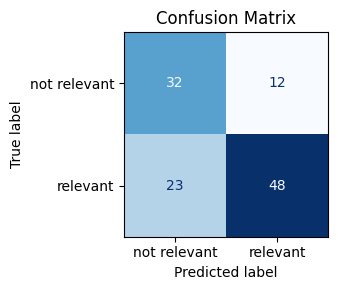

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_binary)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Confusion Matrix') #put title before to avoid cropping
plt.gcf().set_size_inches(4, 3) 

# Prevent cropping
plt.tight_layout()

plt.savefig('./img/confusion_relevant_ori_trafbal_pauOLD.png') # Save the figure before showing
plt.show()

save model

In [ ]:
##max want hdf5
model_json = model.save_model_hdf5()
with open("./model/relevant_arch_ori_n_trafbal.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights('./model/relevant_w_ori_n_trafbal.h5')

In [74]:
model_json = model.to_json()
with open("./model/relevant_arch_ori_n_trafbal.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights('./model/relevant_w_ori_n_trafbal.h5')

New paper with svm

In [ ]:
# Assuming X_train_embedded is your embedded training data
MAX_SEQUENCE_LENGTH = 302 #with pau 
epochs = 50
batch_size = 32
#run from above would be better 

input_dim = X_train.shape[0]
input_length = X_train.shape[1]
output_dim = input_dim
print(input_dim , input_length, output_dim)

In [146]:
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense, Dropout
from sklearn.svm import SVC
from sklearn.metrics import f1_score

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)  # Assuming precision_m and recall_m are defined elsewhere
    recall = recall_m(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

# Define Bi-LSTM model
model = Sequential()
model.add(Embedding(input_dim=X_train.shape[0], output_dim=input_dim, input_length=X_train.shape[1]))
#model.add(Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH)) #keras embedding
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.1)) 
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.1)) 
model.add(Dense(1, activation='sigmoid'))  # linear for svm
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #binary_crossentropy, hinge for svm [f1_m]
model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 302, 510)          260100    
                                                                 
 bidirectional_12 (Bidirect  (None, 302, 256)          654336    
 ional)                                                          
                                                                 
 dropout_12 (Dropout)        (None, 302, 256)          0         
                                                                 
 bidirectional_13 (Bidirect  (None, 128)               164352    
 ional)                                                          
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [ ]:
df_a['pred'] = model.predict('')

In [147]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test set
evaluation = model.evaluate(X_test, Y_test)

loss = evaluation[0]
f1_score = evaluation[1]

# Print evaluation metrics
print('Test set evaluate\n  Loss: {:0.3f}\n  F1 Score: {:0.3f}'.format(loss, f1_score))

y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score for the test set
precision = precision_score(Y_test, y_pred_binary, average='weighted')
recall = recall_score(Y_test, y_pred_binary, average='weighted')
f1_metric = (2 * precision * recall)/(precision + recall)

# Print precision, recall, and F1 score
print('Precision: {:0.3f}\nRecall: {:0.3f}\nF1 Score: {:0.3f}\n'.format(precision, recall, f1_metric))

4/4 [==============================] - 3s 683ms/step - loss: 0.6886 - accuracy: 0.5156
Test set evaluate
  Loss: 0.689
  F1 Score: 0.516
4/4 [==============================] - 4s 668ms/step
Precision: 0.611
Recall: 0.516
F1 Score: 0.559



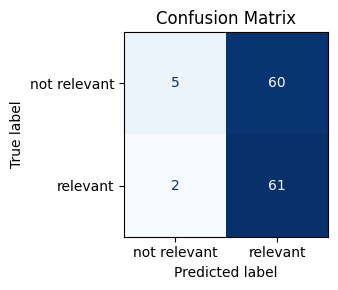

In [148]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_binary)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False)
plt.title('Confusion Matrix') #put title before to avoid cropping
plt.gcf().set_size_inches(4, 3) 

# Prevent cropping
plt.tight_layout()

#plt.savefig('./img/confusion_relevant_ori_trafbal_pauOLD.png') # Save the figure before showing
plt.show()

In [22]:
# Assuming y_true and y_pred are your true and predicted labels respectively
f1 = f1_score(y_true, y_pred)
print("F1 Score:", f1)

NameError: name 'y_true' is not defined

old code

In [ ]:
#clean by word_vector (thai2vec) --took 4.38 sec/1 updated 'cleaned1' row
from pythainlp import word_vector
model = word_vector.WordVector(model_name="thai2fit_wv").get_model() #for spell correction
words = model.index_to_key

w_rank = {}
for i,word in enumerate(words):
    w_rank[word] = i

WORDS = w_rank

thai_letters = 'กขฃคฅฆงจฉชซฌญฎฏฐฑฒณดตถทธนบปผฝพฟภมยรฤฤๅลฦฦๅวศษสหฬอฮะัาำิีึืุูเแโใไ็่้๊๋์'

def words(text): return re.findall(r'\w+', text.lower())

def P(word):
    "Probability of `word`."
    # use inverse of rank as proxy
    # returns 0 if the word isn't in the dictionary
    return - WORDS.get(word, 0)

def correction(word):
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word):
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words):
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = thai_letters
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word):
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(Y_test, y_pred_binary)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues, colorbar=False)

# Get current axis and adjust figure size to fit the matrix
plt.gca().set_aspect('equal', adjustable='box')
plt.gcf().set_size_inches(cm.shape[1], cm.shape[0])  # Set figure size based on matrix dimensions

plt.title('Confusion Matrix')

# Save the figure before showing
plt.savefig('./img/confusion_relevant_ori_trafbal') #_ori_trafbal'

plt.show()


In [1]:
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))


# Get predictions for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)


NameError: name 'model' is not defined

In [166]:
predictions = model.predict(df_a['embedded_array'][0])

TypeError: in user code:

    File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\natkn\anaconda3\envs\gpt-twitter\lib\site-packages\keras\src\layers\rnn\lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'forward_lstm_13' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'forward_lstm_13' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


ROC AUC: 0.500


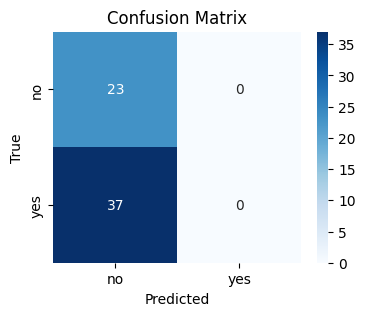

In [55]:
from sklearn.metrics import roc_auc_score
score = roc_auc_score(Y_test, y_pred)
print('ROC AUC: %.3f' % score)
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()